# Initial Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Load DF and General Insight

In [2]:
df = pd.read_csv('Heart Failure Prediction Dataset.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


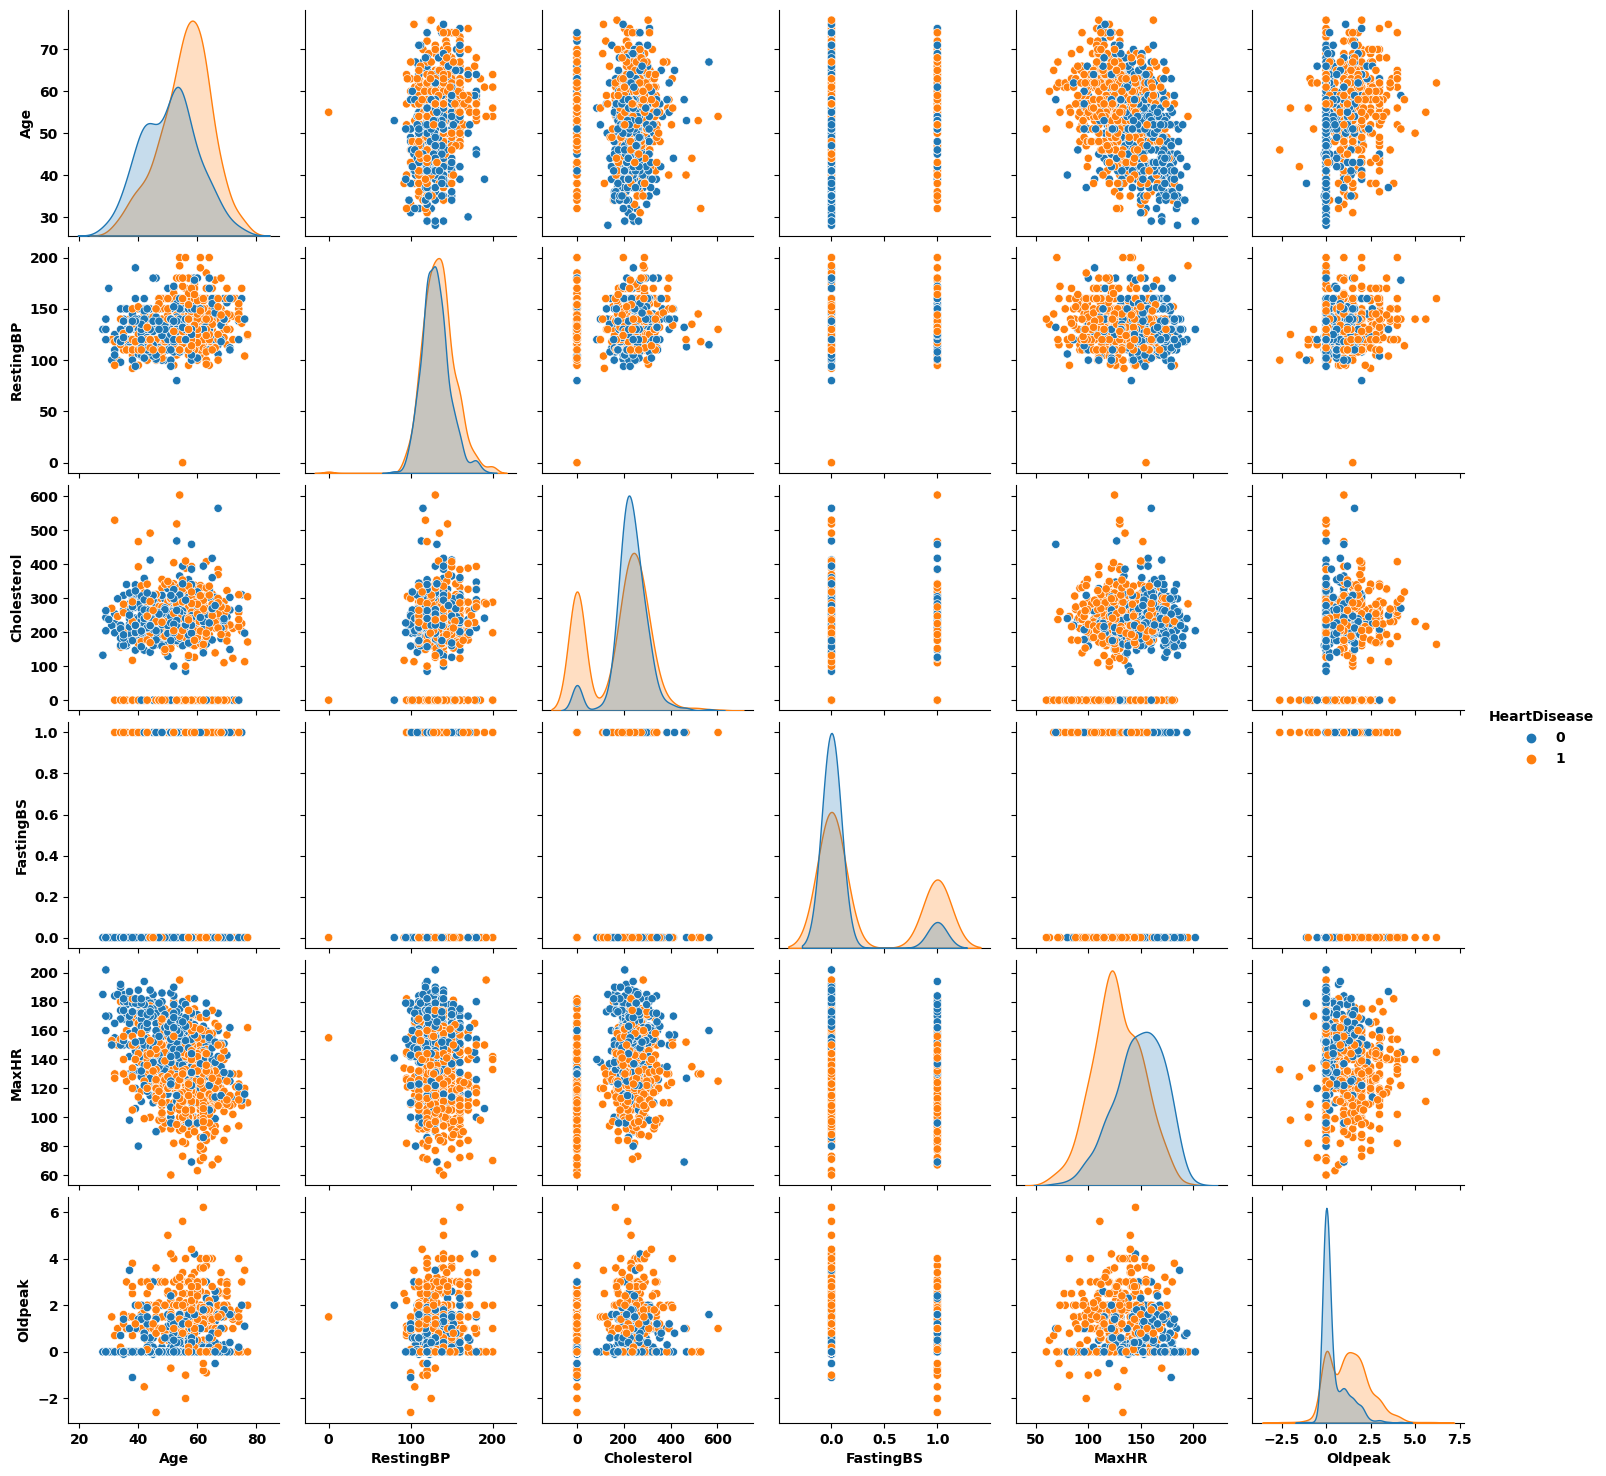

In [6]:
sb.pairplot(df, hue = 'HeartDisease')

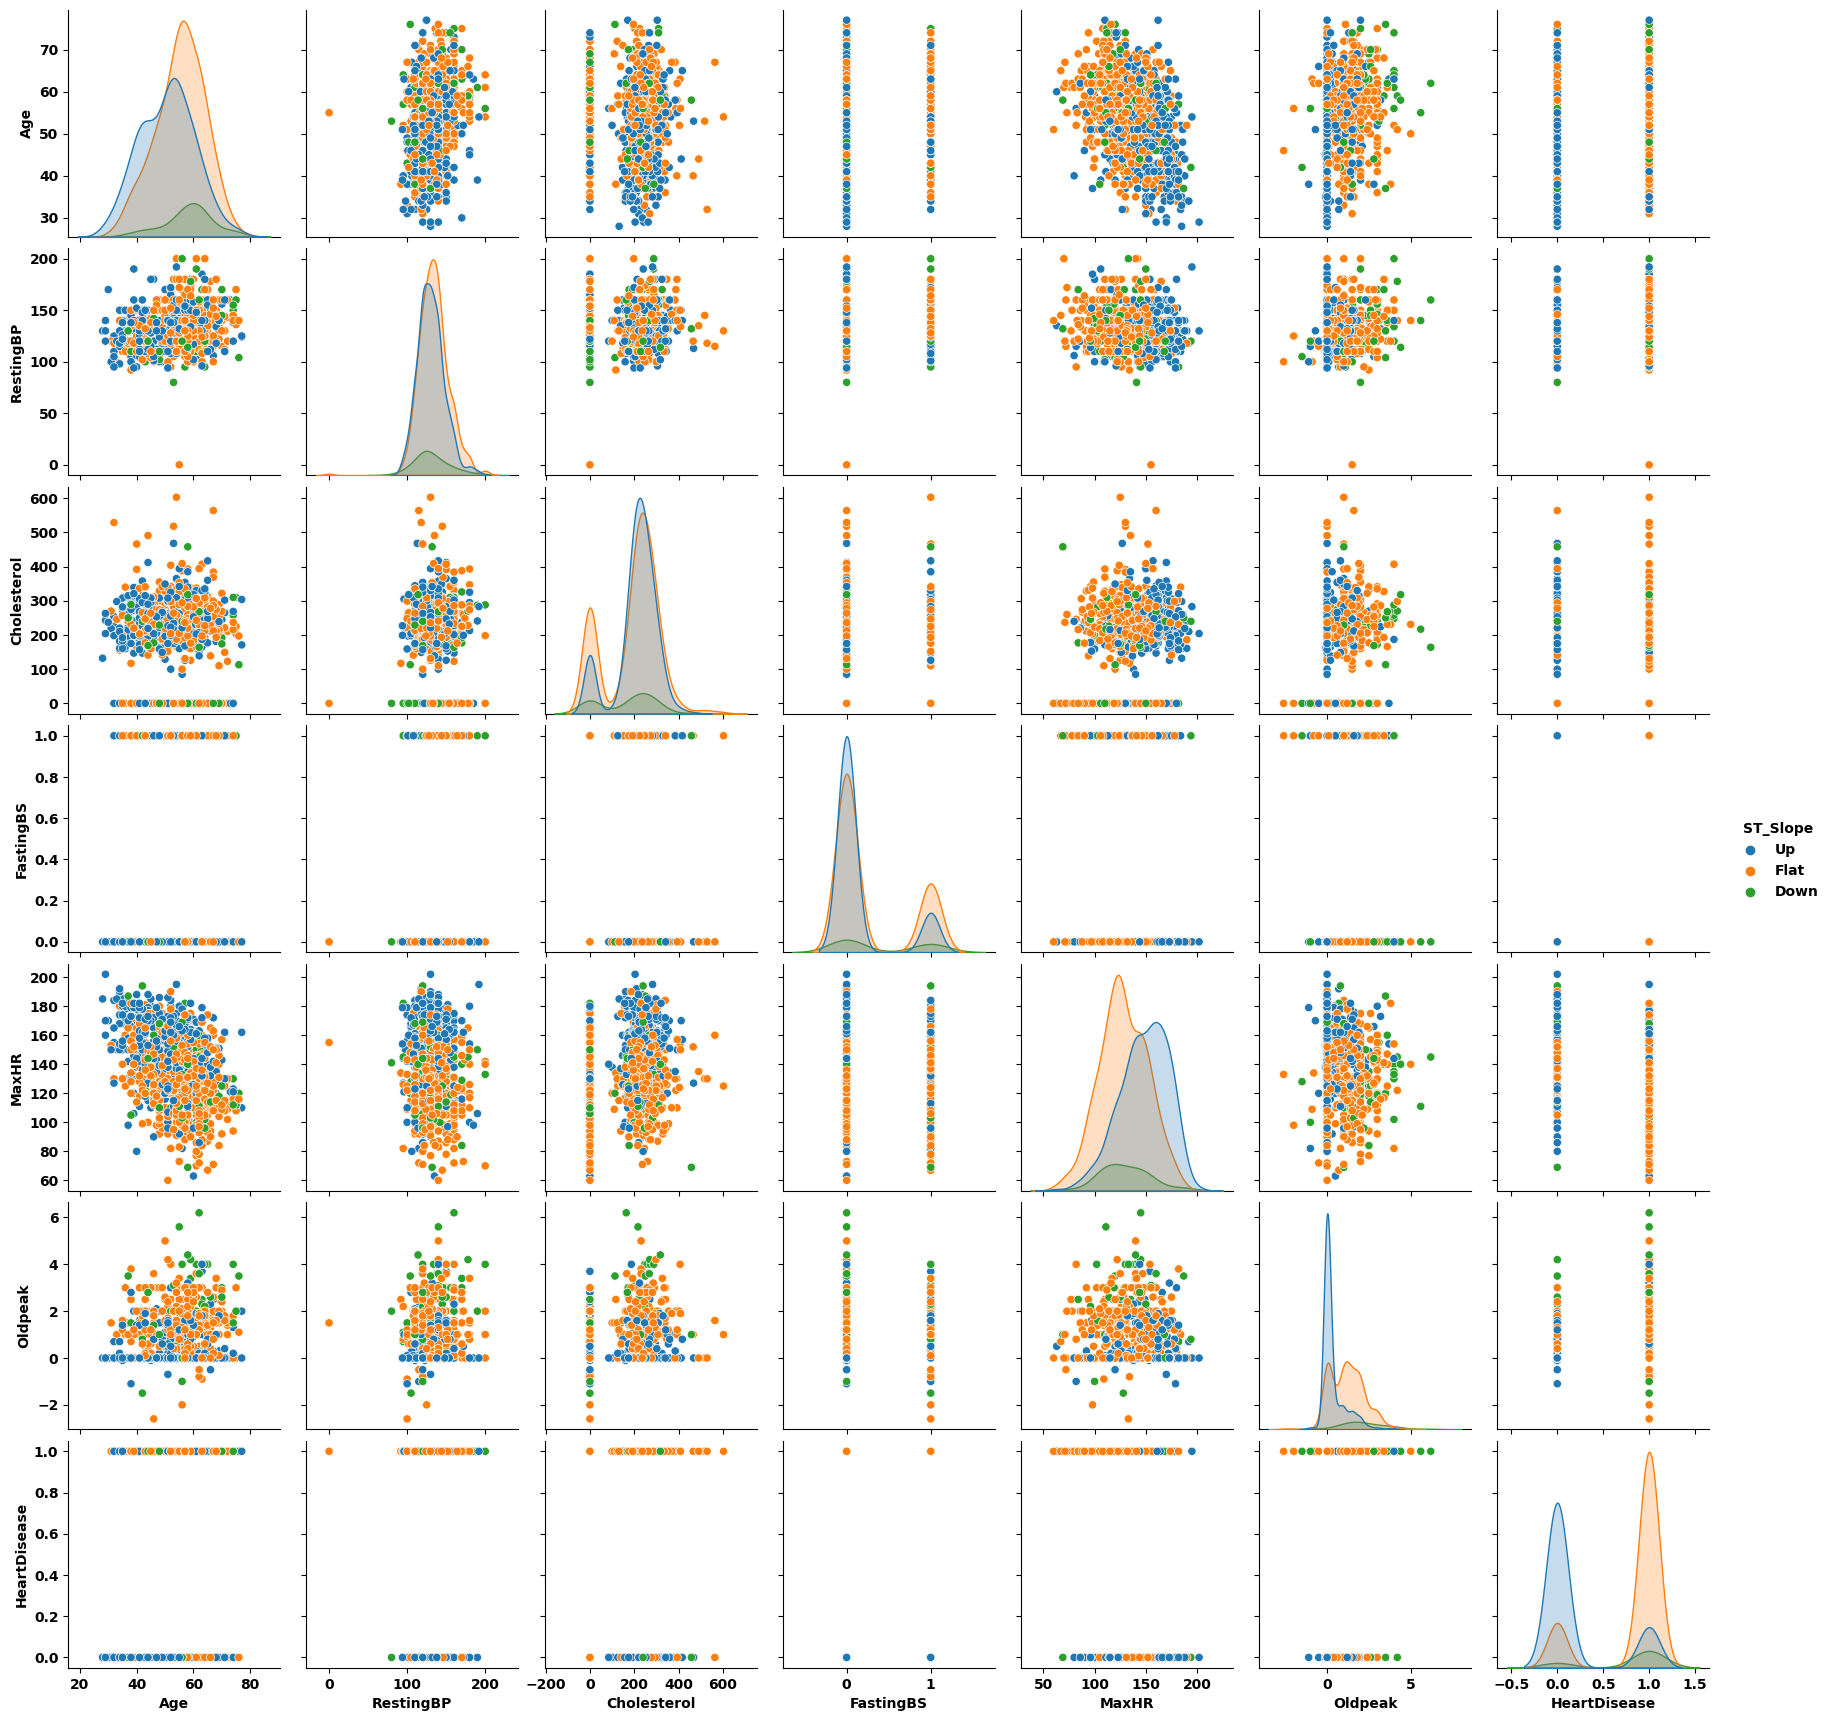

In [7]:
sb.pairplot(df, hue = 'ST_Slope')

In [8]:
print(df.Sex.value_counts())
print(df.ChestPainType.value_counts())
print(df.RestingECG.value_counts())
print(df.ExerciseAngina.value_counts())
print(df.ST_Slope.value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000002661F9FC910>>

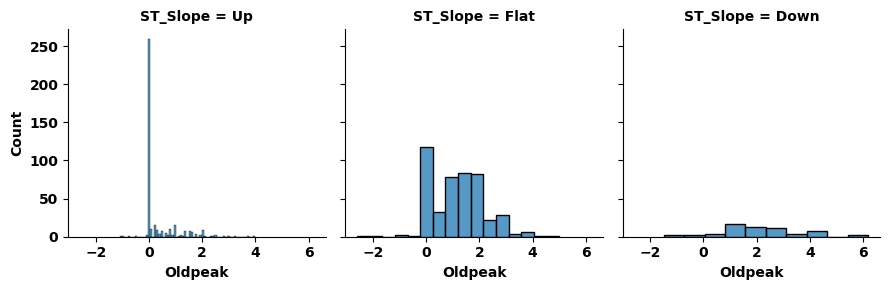

In [9]:
g = sb.FacetGrid(df, col = 'ST_Slope')
g.map(sb.histplot, 'Oldpeak')
g.add_legend

# Data Cleaning and Feature Engineering

## Data Prep for Cholesterol and RestingECG

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
# No Action
df2 = df.copy()

# # Baseline (Delete missing values)
# df2 = df.copy()
# df2 = df2[df2.Cholesterol != 0]
# df2 = df2[df2.RestingBP != 0]

# # By Mean
# df2 = df.copy()
# df2['Cholesterol'][df2.Cholesterol == 0] = df2.Cholesterol.mean()
# df2['RestingBP'][df2.RestingBP == 0] = df2.RestingBP.mean()

# # By Nearest Neighbour
# df2 = df.copy()
# df2['Cholesterol'][df2.Cholesterol == 0] = np.nan
# df2['RestingBP'][df2.RestingBP == 0] = np.nan

# df2.fillna(method = 'bfill', axis=0, inplace = True)

# # KNN Imputer
# from sklearn.impute import KNNImputer
# df2 = df.copy()
# df2['Cholesterol'][df2.Cholesterol == 0] = np.nan
# df2['RestingBP'][df2.RestingBP == 0] = np.nan

# imputer = KNNImputer(n_neighbors=2)
# df2['Cholesterol'] = imputer.fit_transform(np.array(df2.Cholesterol).reshape(-1,1))
# df2['RestingBP'] = imputer.fit_transform(np.array(df2.RestingBP).reshape(-1,1))

In [12]:
df2.head(60)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


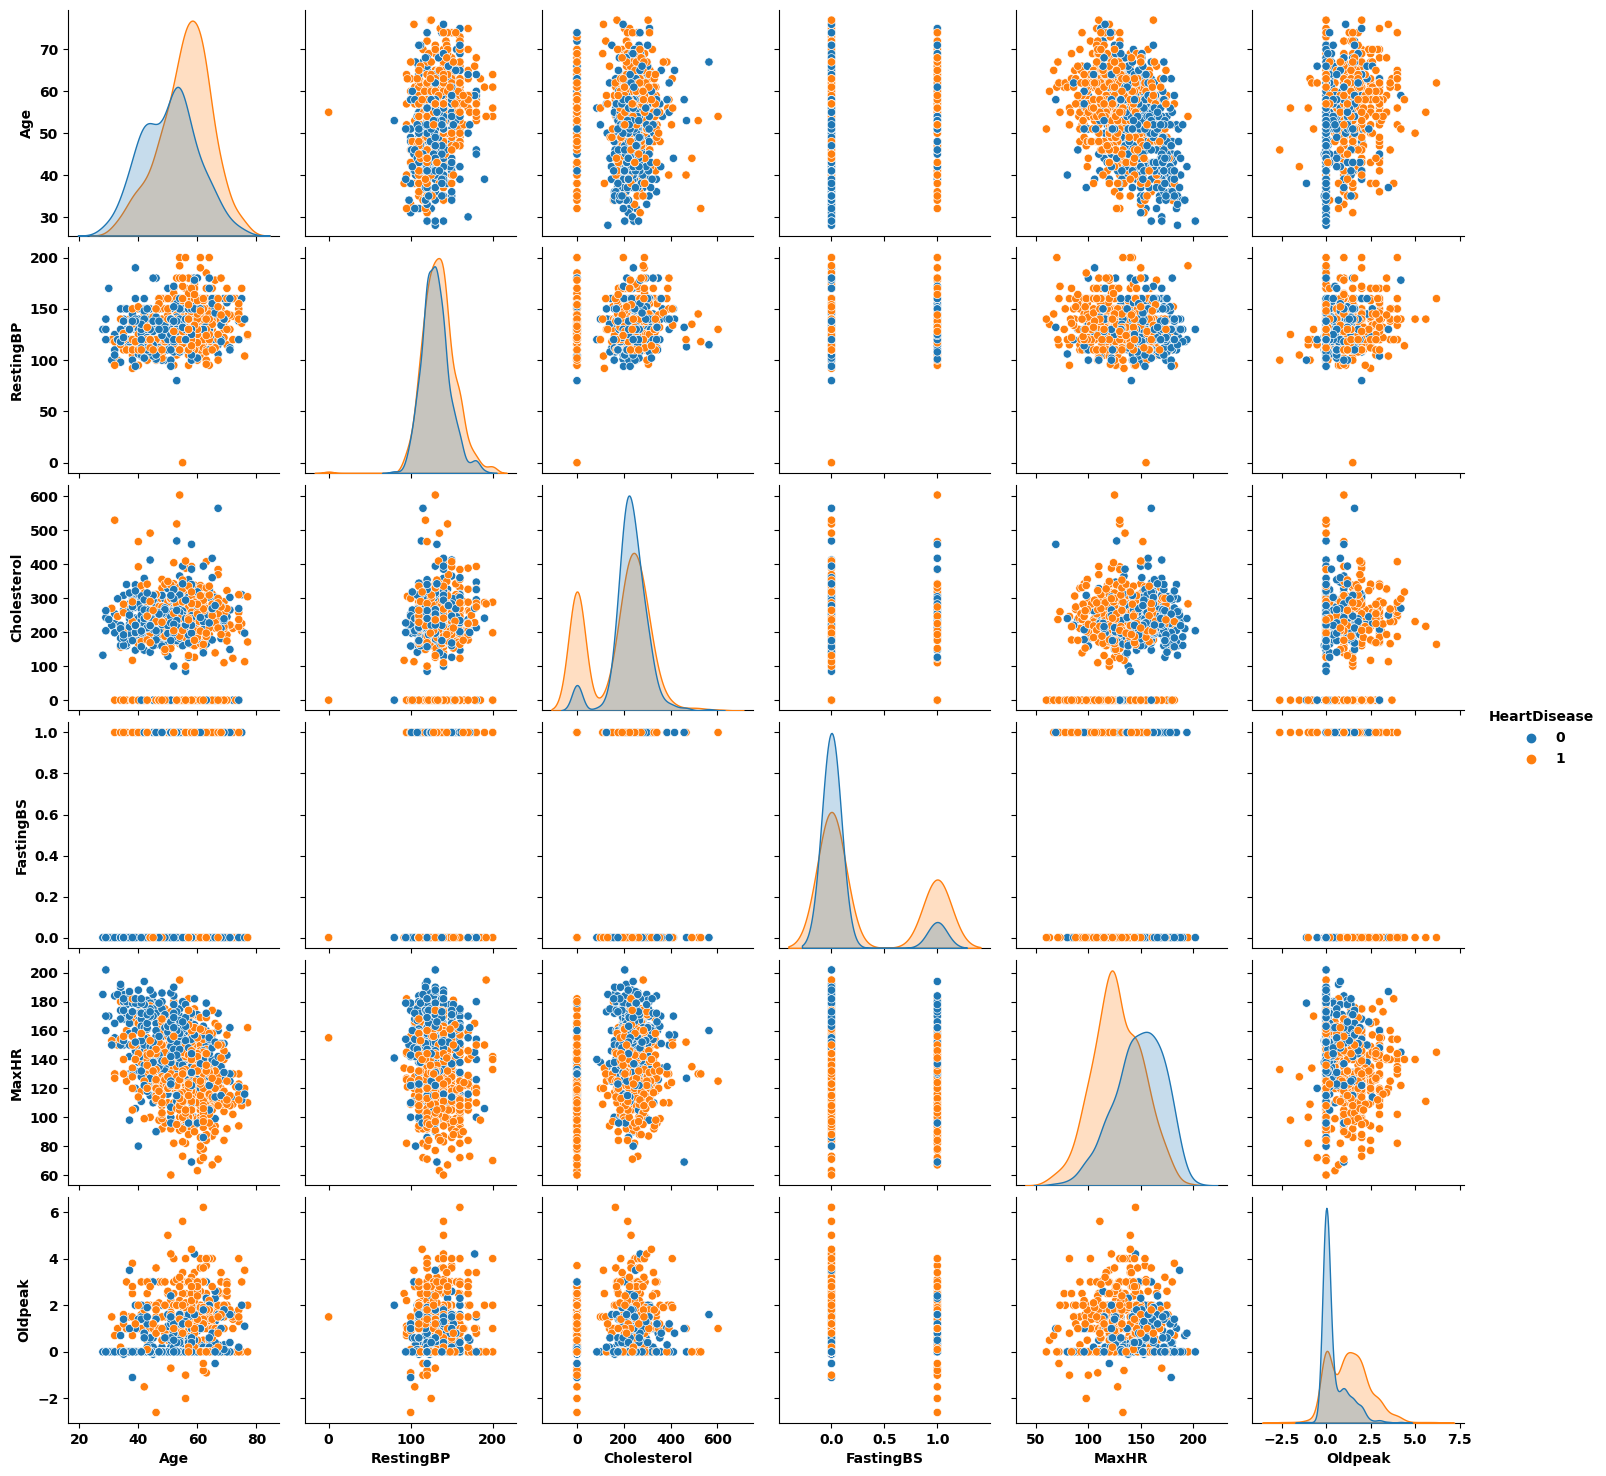

In [14]:
sb.pairplot(df2, hue = 'HeartDisease')

# Main ML Algorithm

## Imports

In [15]:
import sklearn.linear_model as lin
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.svm import SVC
import sklearn.naive_bayes as sknb
from sklearn.neighbors import KNeighborsClassifier

import sklearn.metrics as skm
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.impute import KNNImputer
from sklearn import clone
import itertools

In [16]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Preparation for Linear Models

In [17]:
final_lin = df2.copy()
final_lin = pd.get_dummies(final_lin, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [18]:
final_lin.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### Experimental Run

In [19]:
X_train, X_test, y_train, y_test = train_test_split(final_lin.drop('HeartDisease', axis=1), final_lin.HeartDisease, test_size=0.30, random_state=101)

In [20]:
#lin_model = lin.LinearRegression()
lin_model = lin.LogisticRegression(max_iter=10000)

In [21]:
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
print( 'test score', lin_model.score(X_test, y_test))
print('train score', lin_model.score(X_train, y_train))

test score 0.8369565217391305
train score 0.8800623052959502


In [22]:
df2.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [23]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Praparation Classification Modles

In [24]:
final_class = df2.copy()
final_class.Sex.replace({'M':0, 'F':1}, inplace=True)
final_class.ChestPainType.replace({'ATA':0, 'TA':1, 'ASY':2, 'NAP':3}, inplace=True)
final_class.RestingECG.replace({'Normal':0, 'LVH':1, 'ST':2}, inplace=True)
final_class.ExerciseAngina.replace({'N':0, 'Y':1}, inplace=True)
final_class.ST_Slope.replace({'Up':0, 'Flat':1, 'Down':2}, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(final_class.drop('HeartDisease', axis=1), final_class.HeartDisease, test_size=0.30, random_state=101)


### Experimental Run

In [25]:
class_model = dtc()
#class_model = ens.RandomForestClassifier()
#class_model = SVC()
#class_model = sknb.CategoricalNB()
#class_model = sknb.GaussianNB()

In [26]:
class_model.fit(X_train, y_train)
pred = class_model.predict(X_test)
print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[101  25]
 [ 31 119]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       126
           1       0.83      0.79      0.81       150

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



# Getting Serious

## Regression Modles Testing

In [27]:
lin_model = lin.LinearRegression()
#lin_model = lin.LogisticRegression(max_iter=10000)

In [28]:
final_lin = df2.copy()
#final_lin = pd.get_dummies(final_lin, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
#X_train, X_test, y_train, y_test = train_test_split\
#(final_lin.drop('HeartDisease', axis=1), final_lin.HeartDisease, test_size=0.30, random_state=101)
final_lin.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Gradient decent

### Dimention Reduction

In [29]:
final_lin = df2.copy()

features = {'cols': [], 'scores': []}
score = 0
cat = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for i in range(10, 0, -1):
    cols = itertools.combinations(final_lin.drop('HeartDisease', axis=1).columns, i)
    for c in cols:
        X = final_lin.drop(list(c), axis=1).drop('HeartDisease', axis=1)
        y = final_lin.HeartDisease
        for j in cat:
            if j not in c:
                X = pd.get_dummies(X, columns=[j])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
        lin_model.fit(X_train, y_train)
        
        pred = lin_model.predict(X_test)
        score = lin_model.score(X_test, y_test)
        features['cols'].append(list(c))
        features['scores'].append(score)


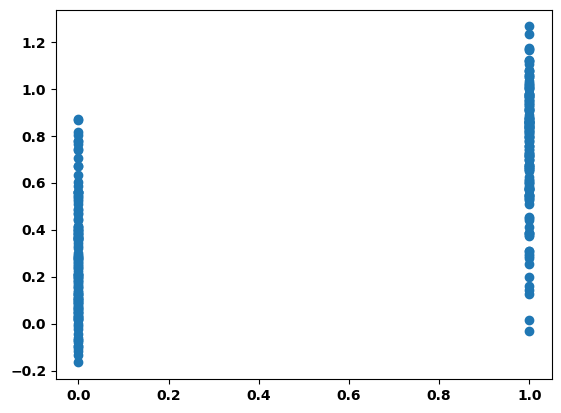

In [30]:
plt.scatter(y_test, pred)

In [31]:
pd.DataFrame(features, columns=['cols', 'scores']).sort_values(by='scores', ascending = False).head()

,cols,scores
2041,[RestingECG],0.523035
2009,"[RestingBP, RestingECG]",0.522959
2025,"[RestingECG, MaxHR]",0.522679
1935,"[RestingBP, RestingECG, MaxHR]",0.522587
1925,"[RestingBP, Cholesterol, RestingECG]",0.522085


### L1, L2 and Elastic

In [32]:
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'tol': [0.0001, 0.001, 0.01, 0.1, 1]}

final_lin = df2.copy()
final_lin = pd.get_dummies(final_lin, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
X_train, X_test, y_train, y_test = train_test_split(final_lin.drop('HeartDisease', axis=1),
                                                    final_lin.HeartDisease,
                                                    test_size=0.30, random_state=101)
param_score = {'alpha': [], 'tol': [], 'score': []} 

for a in params['alpha']:
    for t in params['tol']:
        model = lin.Ridge(alpha=a, tol=t)
        #model = lin.Lasso(alpha=a, tol=t)
        #model = lin.ElasticNet(alpha=a, tol = t)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        param_score['alpha'].append(a)
        param_score['tol'].append(t)
        param_score['score'].append(model.score(X_test, y_test))

In [33]:
param_score = pd.DataFrame(param_score, columns=['alpha', 'tol', 'score']).sort_values(by='score', ascending = False)
param_score.head()

,alpha,tol,score
20,10.0,0.0001,0.520754
24,10.0,1.0000,0.520754
23,10.0,0.1000,0.520754
22,10.0,0.0100,0.520754
21,10.0,0.0010,0.520754


## Logistic Regression Parameters

### Sigmoid, Sensitivity Testing

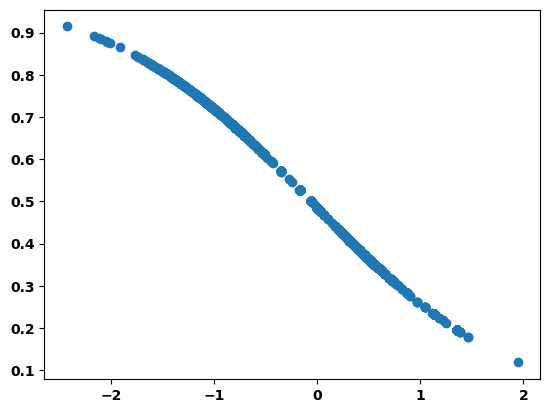

In [34]:
model = lin.LogisticRegression(max_iter=10000)
final_lin = df2.copy()
final_lin = pd.get_dummies(final_lin)
#final_lin = final_lin.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(final_lin.drop('HeartDisease', axis=1),
                                                    final_lin.HeartDisease,
                                                    test_size=0.30, random_state=101)
model.fit(X_train, y_train)

plt.scatter(X_test.values * model.coef_, 1/(1 + np.exp(X_test.values * model.coef_ + model.intercept_)))

In [35]:
model.predict_proba(X_test)

array([[0.74657257, 0.25342743],
       [0.07087508, 0.92912492],
       [0.9664455 , 0.0335545 ],
       [0.02670501, 0.97329499],
       [0.2145798 , 0.7854202 ],
       [0.09119008, 0.90880992],
       [0.95942984, 0.04057016],
       [0.94986707, 0.05013293],
       [0.2814164 , 0.7185836 ],
       [0.48025907, 0.51974093],
       [0.20858289, 0.79141711],
       [0.0597811 , 0.9402189 ],
       [0.92358183, 0.07641817],
       [0.01650626, 0.98349374],
       [0.05232773, 0.94767227],
       [0.93081337, 0.06918663],
       [0.4736471 , 0.5263529 ],
       [0.83018965, 0.16981035],
       [0.04579917, 0.95420083],
       [0.08475603, 0.91524397],
       [0.20455441, 0.79544559],
       [0.90361137, 0.09638863],
       [0.97523911, 0.02476089],
       [0.99025867, 0.00974133],
       [0.94211717, 0.05788283],
       [0.95782427, 0.04217573],
       [0.03886793, 0.96113207],
       [0.56459039, 0.43540961],
       [0.7277665 , 0.2722335 ],
       [0.73276603, 0.26723397],
       [0.

In [36]:
thresh = np.linspace(0, 1, 50)
pred_prob = model.predict_proba(X_test)

scores = {'precision': [], 'recall': [], 'f1_score': [], 'threshold': []}
for t in thresh:
    y_pred = [1   if pred > t else 0 for pred in pred_prob[:,1]]
    scores['recall'].append(skm.recall_score(y_test, y_pred))
    scores['precision'].append(skm.precision_score(y_test, y_pred))
    scores['f1_score'].append(skm.f1_score(y_test, y_pred))
    scores['threshold'].append(t)

C:\Users\rotem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
scores_df = pd.DataFrame(scores, columns = scores.keys())
scores_df.sort_values(by=['f1_score', 'recall'], ascending=False).head()

,precision,recall,f1_score,threshold
15,0.820359,0.913333,0.864353,0.306122
14,0.811765,0.920000,0.862500,0.285714
22,0.836478,0.886667,0.860841,0.448980
23,0.836478,0.886667,0.860841,0.469388
21,0.831250,0.886667,0.858065,0.428571


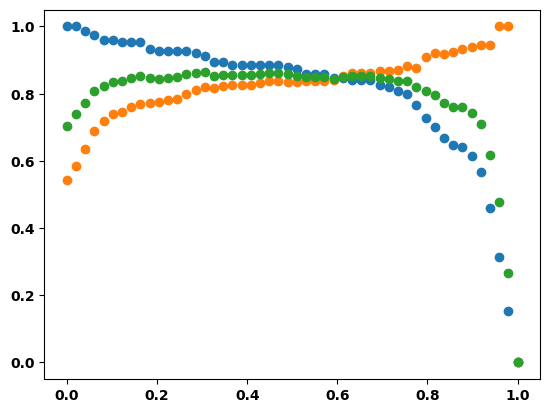

In [38]:
plt.scatter(scores_df.threshold, scores_df.recall)
plt.scatter(scores_df.threshold, scores_df.precision)
plt.scatter(scores_df.threshold, scores_df.f1_score)

## Classification Models

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
#class_model = dtc(min_samples_leaf=2, random_state=101)
#class_model = ens.RandomForestClassifier(n_estimators = 101)
#class_model = SVC(probability = True)
#class_model = sknb.CategoricalNB()
#class_model = sknb.GaussianNB()

In [41]:
ColumnsToEncode = list(df2.select_dtypes(include=['category', 'object']))
le = LabelEncoder()
final_class = df2.copy()

for feature in ColumnsToEncode:
    final_class[feature] = le.fit_transform(final_class[feature])

final_class.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [42]:
final_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [43]:
X_train, X_test, y_train, y_test = train_test_split(final_class.drop('HeartDisease', axis = 1), final_class.HeartDisease,
                                                    test_size=0.30, random_state=42)

### GridSearch

#### DTree

In [44]:
random_stat = [101]
min_sample_split = [1,2, 3, 4]
min_sample_leaf = [1, 2, 3, 4]
param_grid = {'min_samples_leaf': min_sample_leaf, 'min_samples_split': min_sample_split, 'random_state': random_stat}
grid = GridSearchCV(dtc(), param_grid, refit = True, verbose = 0)

grid.fit(X_train, y_train)

C:\Users\rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\rotem\anaconda3\lib\site-packages\sklearn\base.py", line 6

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'random_state': [101]})

In [45]:
print("best params: ", grid.best_params_)

best params:  {'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 101}


In [46]:
model2 = clone(grid.best_estimator_)
pred = grid.best_estimator_.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[ 93  19]
 [ 35 129]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       112
           1       0.87      0.79      0.83       164

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.81       276



#### RForest

In [47]:
random_stat = [101]
min_sample_split = [1,2, 3, 4]
min_sample_leaf = [1, 2, 3, 4]
param_grid = {'min_samples_leaf': min_sample_leaf, 'min_samples_split': min_sample_split, 'random_state': random_stat}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 0)

grid.fit(X_train, y_train)

C:\Users\rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\rotem\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rotem\anaconda3\lib\site-package

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'random_state': [101]})

In [48]:
model3 = clone(grid.best_estimator_)
pred = grid.best_estimator_.predict(X_test)

print("best params: ", grid.best_params_)
print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

best params:  {'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 101}
[[100  12]
 [ 17 147]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.92      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.90       276



#### Support Vector Classifier

In [49]:
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma = [0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C': c, 'gamma': gamma, 'random_state': [101]}

grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 0)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000],
                         'random_state': [101]})

In [50]:
model4 = clone(grid.best_estimator_)
pred = grid.best_estimator_.predict(X_test)

print("best params: ", grid.best_params_)
print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

best params:  {'C': 1, 'gamma': 0.01, 'random_state': 101}
[[ 57  55]
 [ 40 124]]
              precision    recall  f1-score   support

           0       0.59      0.51      0.55       112
           1       0.69      0.76      0.72       164

    accuracy                           0.66       276
   macro avg       0.64      0.63      0.63       276
weighted avg       0.65      0.66      0.65       276



#### Gaussian NB

In [51]:
model = sknb.GaussianNB()

model.fit(X_train, y_train)
pred = model.predict(X_test)

model5 = clone(model)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[ 98  14]
 [ 21 143]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



#### KNN

In [52]:
param_grid = {'n_neighbors': [2, 4, 5, 6, 7, 8]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 0)

grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 5, 6, 7, 8]})

In [53]:
model6 = clone(grid.best_estimator_)
pred = grid.best_estimator_.predict(X_test)

print("best params: ", grid.best_params_)
print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

best params:  {'n_neighbors': 6}
[[ 88  24]
 [ 58 106]]
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       112
           1       0.82      0.65      0.72       164

    accuracy                           0.70       276
   macro avg       0.71      0.72      0.70       276
weighted avg       0.73      0.70      0.71       276



# XGBoost

In [54]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [55]:
X_train, X_test, y_train, y_test = train_test_split(final_class.drop('HeartDisease', axis = 1), final_class.HeartDisease,
                                                    test_size=0.30, random_state=42)
model = GBC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model7 = GBC()

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[ 99  13]
 [ 26 138]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       112
           1       0.91      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



# Voting

In [56]:
from sklearn.ensemble import VotingClassifier

In [57]:
X_train, X_test, y_train, y_test = train_test_split(final_class.drop('HeartDisease', axis = 1), final_class.HeartDisease,
                                                    test_size=0.30, random_state=42)

model1 = lin.LogisticRegression(max_iter=10000)

emodel = VotingClassifier(estimators=[('LogisticReg', model1),
                                      ('DTree', model2),
                                      ('RForest', model3),
                                      ('SVC', model4),
                                      ('NBGaussian', model5),
                                      ('knn', model6),
                                      ('XGBoost', model7)],
                                      voting = 'soft')

emodel2 = VotingClassifier(estimators=[('LogisticReg', model1),
                                      ('DTree', model2),
                                      ('RForest', model3),
                                      ('SVC', model4),
                                      ('NBGaussian', model5),
                                      ('knn', model6),
                                      ('XGBoost', model7)],
                                      voting = 'hard')
emodel.fit(X_train, y_train)
pred = emodel.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[100  12]
 [ 18 146]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.92      0.89      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



# Compact Cross Comparison. All Models, All Dataprep Methods

In [58]:
def RecordAll(df, models):
    df = df[df.RestingBP != 0]
    df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
    def NoAction(df):
        return df.copy()
    
    def Baseline(df):
        dft = df.copy()
        dft = dft[dft.Cholesterol != 0]
        return dft
    
    def ByMean(df):
        dft = df.copy()
        dft['Cholesterol'][dft.Cholesterol == 0] = dft.Cholesterol.mean()
        return dft
    
    def ByNearest(df):
        dft = df.copy()
        dft['Cholesterol'][dft.Cholesterol == 0] = np.nan
        dft.fillna(method = 'bfill', axis = 0, inplace = True)
        return dft
    
    def ByKNN(df):
        dft = df.copy()
        dft['Cholesterol'][dft.Cholesterol == 0] = np.nan
        
        imputer = KNNImputer(n_neighbors=2)
        dft['Cholesterol'] = imputer.fit_transform(np.array(dft.Cholesterol).reshape(-1,1))
        return dft
        
    dataprep = {'No Action': NoAction,
                'Baseline': Baseline,
                'By Mean': ByMean,
                'By Nearest Neigbour': ByNearest,
                'By KNN Imputer': ByKNN}
    
    
    df_p = pd.DataFrame(columns= dataprep.keys(), index = models.keys())
    df_r = pd.DataFrame(columns= dataprep.keys(), index = models.keys())
    df_f1 = pd.DataFrame(columns= dataprep.keys(), index = models.keys())
    for col, method in dataprep.items():
        dft = method(df)
        X_train, X_test, y_train, y_test = train_test_split(dft.drop('HeartDisease', axis = 1),
                                                            dft.HeartDisease,
                                                            test_size=0.30, random_state=42)
        precision = []
        recall = []
        f1 = []
        for row, mod in models.items():
            model = clone(mod)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            precision.append(skm.precision_score(y_test, pred))
            recall.append(skm.recall_score(y_test, pred))
            f1.append(skm.f1_score(y_test, pred))
        df_p[col] = precision
        df_r[col] = recall
        df_f1[col] = f1
    
    
    return df_p, df_r, df_f1

In [59]:
models = {'LogisticReg': model1,
          'DTree': model2,
          'RForest': model3,
          'SVC': model4,
          'NBGaussian': model5,
          'knn': model6,
          'XGBoost': model7,
          'SVoting': clone(emodel),
          'HVoting': clone(emodel2)
         }

In [60]:
precision, recall, f1 = RecordAll(df, models)

C:\Users\rotem\AppData\Local\Temp\ipykernel_119988\4293726021.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Cholesterol'][dft.Cholesterol == 0] = dft.Cholesterol.mean()
C:\Users\rotem\AppData\Local\Temp\ipykernel_119988\4293726021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Cholesterol'][dft.Cholesterol == 0] = np.nan
C:\Users\rotem\AppData\Local\Temp\ipykernel_119988\4293726021.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [61]:
print(precision.max())
precision

No Action              0.937888
Baseline               0.915888
By Mean                0.931250
By Nearest Neigbour    0.931677
By KNN Imputer         0.930818
dtype: float64


,No Action,Baseline,By Mean,By Nearest Neigbour,By KNN Imputer
LogisticReg,0.937888,0.882883,0.930818,0.931250,0.930380
DTree,0.884615,0.858586,0.882353,0.880000,0.894737
RForest,0.914634,0.892857,0.919255,0.931677,0.918750
SVC,0.720670,0.684211,0.703488,0.697802,0.706897
NBGaussian,0.924528,0.876106,0.915033,0.915033,0.914474
knn,0.822581,0.700000,0.801724,0.824000,0.808333
XGBoost,0.902439,0.898148,0.907407,0.906832,0.906250
SVoting,0.932927,0.909091,0.931250,0.930818,0.930818
HVoting,0.926829,0.915888,0.924051,0.930380,0.929936


In [62]:
print(recall.max())
recall

No Action              0.905325
Baseline               0.884956
By Mean                0.881657
By Nearest Neigbour    0.887574
By KNN Imputer         0.875740
dtype: float64


,No Action,Baseline,By Mean,By Nearest Neigbour,By KNN Imputer
LogisticReg,0.893491,0.867257,0.875740,0.881657,0.869822
DTree,0.816568,0.752212,0.798817,0.781065,0.804734
RForest,0.887574,0.884956,0.875740,0.887574,0.869822
SVC,0.763314,0.460177,0.715976,0.751479,0.727811
NBGaussian,0.869822,0.876106,0.828402,0.828402,0.822485
knn,0.603550,0.495575,0.550296,0.609467,0.573964
XGBoost,0.875740,0.858407,0.869822,0.863905,0.857988
SVoting,0.905325,0.884956,0.881657,0.875740,0.875740
HVoting,0.899408,0.867257,0.863905,0.869822,0.863905


In [63]:
print(f1.max())
f1

No Action              0.918919
Baseline               0.896861
By Mean                0.905775
By Nearest Neigbour    0.909091
By KNN Imputer         0.902439
dtype: float64


,No Action,Baseline,By Mean,By Nearest Neigbour,By KNN Imputer
LogisticReg,0.915152,0.875000,0.902439,0.905775,0.899083
DTree,0.849231,0.801887,0.838509,0.827586,0.847352
RForest,0.900901,0.888889,0.896970,0.909091,0.893617
SVC,0.741379,0.550265,0.709677,0.723647,0.717201
NBGaussian,0.896341,0.876106,0.869565,0.869565,0.866044
knn,0.696246,0.580311,0.652632,0.700680,0.671280
XGBoost,0.888889,0.877828,0.888218,0.884848,0.881459
SVoting,0.918919,0.896861,0.905775,0.902439,0.902439
HVoting,0.912913,0.890909,0.892966,0.899083,0.895706


## Dim Reduction for best model: Soft Voting

In [64]:

df2 = df[df.RestingBP != 0].copy()
features = {'cols': [], 'scores': []}
score = 0
cat = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


for i in range(10, 0, -1):
    cols = itertools.combinations(df2.drop('HeartDisease', axis=1).columns, i)
    for c in cols:
        m = clone(emodel)
        X = pd.get_dummies(df2.drop(list(c), axis=1).drop('HeartDisease', axis=1))
        y = df2.HeartDisease
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
        m.fit(X_train, y_train)
        
        pred = m.predict(X_test)
        score = skm.recall_score(y_test, pred)
        features['cols'].append([col for col in df2.drop('HeartDisease', axis=1).columns if col not in c])
        features['scores'].append(score)

In [65]:
df_score = pd.DataFrame(features, columns=['cols', 'scores'])
df_score.sort_values(by='scores', ascending = False).head(10)

,cols,scores
4,[RestingECG],1.000000
5,[FastingBS],1.000000
52,"[Sex, FastingBS]",0.935714
164,"[Sex, FastingBS, RestingECG]",0.928571
1806,"[Age, Sex, ChestPainType, RestingBP, Cholester...",0.914286
176,"[Sex, RestingBP, FastingBS]",0.914286
904,"[Age, ChestPainType, Cholesterol, ExerciseAngi...",0.914286
9,[Sex],0.914286
51,"[Sex, RestingECG]",0.914286
1194,"[Sex, ChestPainType, Cholesterol, FastingBS, R...",0.907143


## Comparing different dimetion reductions

In [66]:
df_score['cols'][5]

['FastingBS']

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [68]:
final_model = clone(emodel)
df_final = df[df.RestingBP != 0].copy()
X = pd.get_dummies(df_final[df_score['cols'][5]])
y = df_final.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, random_state=101)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[  0 136]
 [  0 140]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.51      1.00      0.67       140

    accuracy                           0.51       276
   macro avg       0.25      0.50      0.34       276
weighted avg       0.26      0.51      0.34       276



C:\Users\rotem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rotem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rotem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
df_score['cols'][4]

['RestingECG']

In [70]:
final_model = clone(emodel)
df_final = df[df.RestingBP != 0].copy()
X = pd.get_dummies(df_final[df_score['cols'][4]])
y = df_final.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, random_state=101)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[  0 136]
 [  0 140]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.51      1.00      0.67       140

    accuracy                           0.51       276
   macro avg       0.25      0.50      0.34       276
weighted avg       0.26      0.51      0.34       276



C:\Users\rotem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rotem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rotem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
df_score['cols'][52]

['Sex', 'FastingBS']

In [72]:
final_model = clone(emodel)
df_final = df[df.RestingBP != 0].copy()
X = pd.get_dummies(df_final[df_score['cols'][52]])
y = df_final.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, random_state=101)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[ 45  91]
 [  9 131]]
              precision    recall  f1-score   support

           0       0.83      0.33      0.47       136
           1       0.59      0.94      0.72       140

    accuracy                           0.64       276
   macro avg       0.71      0.63      0.60       276
weighted avg       0.71      0.64      0.60       276



In [73]:
df_score['cols'][164]

['Sex', 'FastingBS', 'RestingECG']

In [74]:
final_model = clone(emodel)
df_final = df[df.RestingBP != 0].copy()
X = pd.get_dummies(df_final[df_score['cols'][164]])
y = df_final.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, random_state=101)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[ 47  89]
 [ 10 130]]
              precision    recall  f1-score   support

           0       0.82      0.35      0.49       136
           1       0.59      0.93      0.72       140

    accuracy                           0.64       276
   macro avg       0.71      0.64      0.61       276
weighted avg       0.71      0.64      0.61       276



In [75]:
df_score['cols'][557]

['Age', 'Sex', 'ChestPainType', 'RestingECG']

In [76]:
final_model = clone(emodel)
df_final = df[df.RestingBP != 0].copy()
X = pd.get_dummies(df_final[df_score['cols'][557]])
y = df_final.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, random_state=101)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[ 94  42]
 [ 13 127]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       136
           1       0.75      0.91      0.82       140

    accuracy                           0.80       276
   macro avg       0.81      0.80      0.80       276
weighted avg       0.81      0.80      0.80       276



In [87]:
final_model = clone(emodel)
df_final = df[df.RestingBP != 0].copy()
X = pd.get_dummies(df_final.drop('HeartDisease', axis=1))
y = df_final.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, random_state=42)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[ 96  11]
 [ 16 153]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.93      0.91      0.92       169

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



In [88]:
X = pd.get_dummies(df_final[df_final.Cholesterol == 0].drop('HeartDisease', axis=1))
y = df_final[df_final.Cholesterol == 0].HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, random_state=42)

In [89]:

pred = final_model.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[ 3  2]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.96      0.98      0.97        47

    accuracy                           0.94        52
   macro avg       0.85      0.79      0.82        52
weighted avg       0.94      0.94      0.94        52



In [90]:
X = pd.get_dummies(df_final[df_final.Cholesterol != 0].drop('HeartDisease', axis=1))
y = df_final[df_final.Cholesterol != 0].HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, random_state=42)

In [91]:
pred = final_model.predict(X_test)

print(skm.confusion_matrix(y_test, pred))
print(skm.classification_report(y_test, pred))

[[104   7]
 [ 10 103]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       111
           1       0.94      0.91      0.92       113

    accuracy                           0.92       224
   macro avg       0.92      0.92      0.92       224
weighted avg       0.92      0.92      0.92       224

